In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib

from bisect import bisect_left
from scipy.stats import norm, cumfreq
import matplotlib.pyplot as plt

In [2]:
!ls ../data

master_2013.csv  master_2014.csv  master.csv  simple_combined.csv


In [3]:
df = pd.read_csv('../data/master_2014.csv')

# First float all values in throughput and latency columns
df['ThroughputData.Mean'] = df['ThroughputData.Mean'].apply(lambda x: np.float64(x))
df['LatencyData.Mean'] = df['LatencyData.Mean'].apply(lambda x: np.float64(x))
df['ThroughputData.Med'] = df['ThroughputData.Med'].apply(lambda x: np.float64(x))
df['LatencyData.Med'] = df['LatencyData.Med'].apply(lambda x: np.float64(x))

/playpen/anaconda/lib/python2.7/site-packages/pandas/io/parsers.py:1159: DtypeWarning: Columns (10,11,13,25,87,88,104) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


In [4]:
import statsmodels.api as sm # recommended import according to the docs

%matplotlib inline

df.info()
df['ThroughputData.Med'].head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194239 entries, 0 to 194238
Columns: 117 entries, Key to Unnamed: 16
dtypes: float64(79), object(38)
memory usage: 174.9+ MB


0    1.404963
1    5.867318
2    1.889566
3    0.463903
4    9.881799
Name: ThroughputData.Med, dtype: float64

In [5]:
medianLatencies = np.asarray(df['LatencyData.Med'].apply(lambda x: -1 if np.isnan(x) or np.isinf(x) or x > 500 else x))
clean = []
for ml in medianLatencies:
    if ml > 0:
        clean.append(ml)
sml = sorted(clean)

ecdf = sm.distributions.ECDF(sml)

med_lat_x = np.linspace(min(sml), max(sml))
med_lat_y = ecdf(med_lat_x)

In [6]:
meanLatencies = np.asarray(df['LatencyData.Mean'].apply(lambda x: -1 if np.isnan(x) or np.isinf(x) or x > 1000 else x))
clean1 = []
for meanl in meanLatencies:
    if meanl > 0:
        clean1.append(meanl)
smeanl = sorted(clean1)

ecdf = sm.distributions.ECDF(smeanl)

mean_lat_x = np.linspace(min(smeanl), max(smeanl))
mean_lat_y = ecdf(mean_lat_x)

In [7]:
medThru = np.asarray(df['ThroughputData.Med'].apply(lambda x: -1 if np.isnan(x) or np.isinf(x) or x > 100 else x))
clean2 = []
for medt in medThru:
    if medt > 0:
        clean2.append(medt)
smedthru = sorted(clean2)

ecdf = sm.distributions.ECDF(smedthru)

med_thru_x = np.linspace(min(smedthru), max(smedthru))
med_thru_y = ecdf(med_thru_x)

In [8]:
meanThru = np.asarray(df['ThroughputData.Mean'].apply(lambda x: -1 if np.isnan(x) or np.isinf(x) or x > 100 else x))
clean3 = []
for meant in meanThru:
    if meant > 0:
        clean3.append(meant)
smeanthru = sorted(clean3)

ecdf = sm.distributions.ECDF(smeanthru)

mean_thru_x = np.linspace(min(smeanthru), max(smeanthru))
mean_thru_y = ecdf(mean_thru_x)

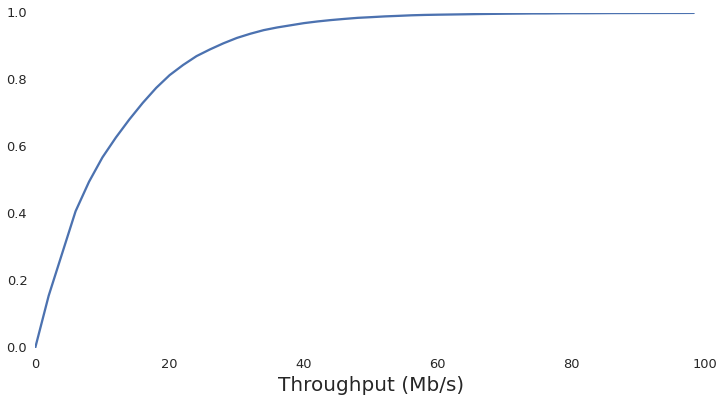

In [13]:
sns.set_context("talk",rc={"figure.figsize": (12, 6)})
sns.axes_style("darkgrid",{"grid.linewidth": .5})
plt.plot(med_thru_x, med_thru_y)
#plt.title("CDF of Median Latencies", fontsize=20)
plt.xlabel("Throughput (Mb/s)", fontsize=20)

# for label in (ax0.get_xticklabels() + ax0.get_yticklabels() + ax1.get_xticklabels() + ax1.get_yticklabels()):
#     label.set_fontsize(15)

In [10]:
# fig, axes = plt.figsize=(15,5))

# line_med = ax0.plot(med_lat_x, med_lat_y)
# ax0.set_title("CDF of Median Latencies", fontsize=20)
# ax0.set_xlabel("Latency (ms)", fontsize=20)

# line_mean = ax1.plot(mean_lat_x, mean_lat_y)
# ax1.set_title("CDF of Mean Latencies", fontsize=20)
# ax1.set_xlabel("Latency (ms)", fontsize=20)

for label in (ax0.get_xticklabels() + ax0.get_yticklabels() + ax1.get_xticklabels() + ax1.get_yticklabels()):
    label.set_fontsize(15)

fig.show()

NameError: name 'ax0' is not defined

In [ ]:
print "Median latency: ", np.median(df['LatencyData.Med'])
print "Mean latency: ", np.mean(meanLatencies) #Data skewed by outliers

print med_lat_x
print med_lat_y

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
ax0, ax1 = axes.flat

ax0.plot(med_thru_x, med_thru_y)
ax0.set_title("CDF of Median Throughputs", fontsize=20)
ax0.set_xlabel("Throughput (Mb/s)", fontsize=20)

ax1.plot(mean_thru_x, mean_thru_y)
ax1.set_title("CDF of Mean Throughputs", fontsize=20)
ax1.set_xlabel("Throughput (Mb/s)", fontsize=20)

for label in (ax0.get_xticklabels() + ax0.get_yticklabels() + ax1.get_xticklabels() + ax1.get_yticklabels()):
    label.set_fontsize(15)

fig.show()

In [ ]:
print "Median throughput: ", np.median(df['ThroughputData.Med'])
print "Mean throughput: ", np.mean(meanThru) #Data skewed by outliers

In [ ]:
df2013 = pd.read_csv('../data/master_2013.csv')
buffRatio = df2013[np.isfinite(df2013['YouTubeStats.BuffRatio'])]
cols = buffRatio.columns.tolist()
buffRatio['YouTubeStats.BuffRatio'].head()

In [ ]:
buffRatio['YouTubeStats.BuffRatio'] = buffRatio['YouTubeStats.BuffRatio'].apply(lambda x: np.float(x))
#meanThroughputs = np.asarray(df['ThroughputData.Mean'].apply(lambda x: -1 if np.isnan(x) or np.isinf(x) or x < 0 else x))
brts = np.asarray(buffRatio['YouTubeStats.BuffRatio'].apply(lambda x: -1 if np.isnan(x) or np.isinf(x) or x < 0 else x))

In [ ]:
brts

In [ ]:
clean4 = []
for b in brts:
    if b > 0:
        clean4.append(b)
sbrts = sorted(clean4)

ecdf = sm.distributions.ECDF(sbrts)

brts_x = np.linspace(min(sbrts), max(sbrts))
brts_y = ecdf(brts_x)

In [ ]:
plt.plot(brts_x, brts_y)

plt.xlabel('Buffer Ratio')
plt.title('CDF of Buffer Ratios measured in 2013 net-score NSDT tests')
plt.grid(True)
plt.show()